# Training a model on your own set of images
## Cats & dogs dataset in this case

In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread(r'C:\Users\Chang.LAPTOP-KLP71L1N\Documents\SPECIAL_PROJECTS\Cats and Dogs\CATS_DOGS\CATS_DOGS\train\CAT\4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

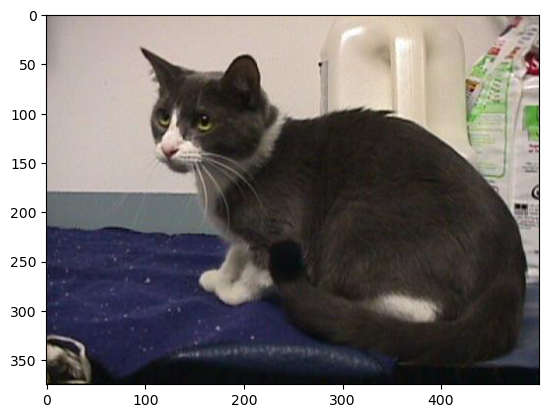

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog2 = cv2.imread(r'C:\Users\Chang.LAPTOP-KLP71L1N\Documents\SPECIAL_PROJECTS\Cats and Dogs\CATS_DOGS\CATS_DOGS\train\DOG/2.jpg')

In [7]:
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

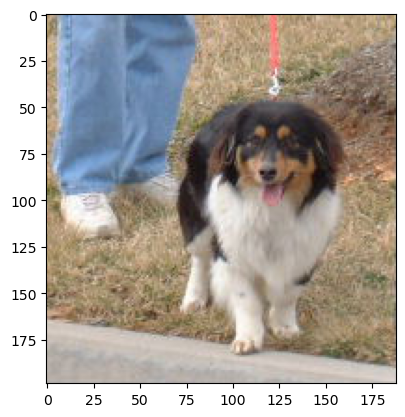

In [8]:
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

In [10]:
dog2.max()

255

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest' 
                              )

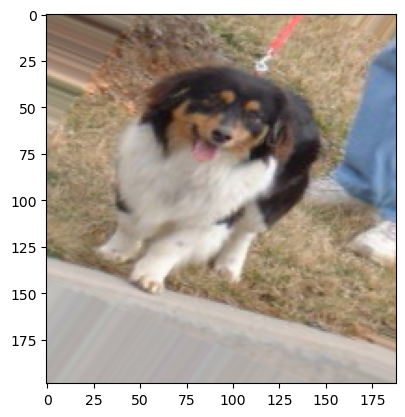

In [13]:
plt.imshow(image_gen.random_transform(dog2))

In [14]:
#image_gen.flow_from_directory('')

In [15]:
# Arbritrary number, but still chosen to be close to the average of the shapes of the photos
input_shape = (150,150,3)

In [16]:
from keras.models import Sequential

In [17]:
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# randomly turns off neurons to help prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [20]:
batch_size = 16

train_img_gen = image_gen.flow_from_directory(r'C:\Users\Chang.LAPTOP-KLP71L1N\Documents\SPECIAL_PROJECTS\Cats and Dogs\CATS_DOGS\CATS_DOGS\train',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_img_gen = image_gen.flow_from_directory(r'C:\Users\Chang.LAPTOP-KLP71L1N\Documents\SPECIAL_PROJECTS\Cats and Dogs\CATS_DOGS\CATS_DOGS\test',
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
results = model.fit_generator(train_img_gen, epochs=100, steps_per_epoch=150, 
                             validation_data=test_img_gen, validation_steps=12)

Epoch 1/100
150/150 [==============================] - 50s 325ms/step - loss: 0.6979 - accuracy: 0.5013 - val_loss: 0.6930 - val_accuracy: 0.4635
Epoch 2/100
150/150 [==============================] - 53s 351ms/step - loss: 0.6891 - accuracy: 0.5238 - val_loss: 0.6902 - val_accuracy: 0.5417
Epoch 3/100
150/150 [==============================] - 49s 327ms/step - loss: 0.6870 - accuracy: 0.5688 - val_loss: 0.6841 - val_accuracy: 0.5625
Epoch 4/100
150/150 [==============================] - 48s 320ms/step - loss: 0.6848 - accuracy: 0.5525 - val_loss: 0.6833 - val_accuracy: 0.5365
Epoch 5/100
150/150 [==============================] - 48s 320ms/step - loss: 0.6820 - accuracy: 0.5683 - val_loss: 0.6920 - val_accuracy: 0.5312
Epoch 6/100
150/150 [==============================] - 49s 325ms/step - loss: 0.6823 - accuracy: 0.5450 - val_loss: 0.6731 - val_accuracy: 0.6042
Epoch 7/100
150/150 [==============================] - 52s 348ms/step - loss: 0.6800 - accuracy: 0.5608 - val_loss: 0.6791 -

Epoch 57/100
150/150 [==============================] - 53s 350ms/step - loss: 0.4772 - accuracy: 0.7912 - val_loss: 0.4904 - val_accuracy: 0.7760
Epoch 58/100
150/150 [==============================] - 51s 340ms/step - loss: 0.4621 - accuracy: 0.7929 - val_loss: 0.3936 - val_accuracy: 0.8125
Epoch 59/100
150/150 [==============================] - 52s 344ms/step - loss: 0.4552 - accuracy: 0.7800 - val_loss: 0.4842 - val_accuracy: 0.7760
Epoch 60/100
150/150 [==============================] - 53s 352ms/step - loss: 0.4743 - accuracy: 0.7767 - val_loss: 0.4285 - val_accuracy: 0.8021
Epoch 61/100
150/150 [==============================] - 51s 341ms/step - loss: 0.4562 - accuracy: 0.7779 - val_loss: 0.4594 - val_accuracy: 0.8021
Epoch 62/100
150/150 [==============================] - 50s 332ms/step - loss: 0.4586 - accuracy: 0.7917 - val_loss: 0.3759 - val_accuracy: 0.8542
Epoch 63/100
150/150 [==============================] - 50s 336ms/step - loss: 0.4522 - accuracy: 0.7862 - val_loss: 0

In [25]:
# model evaluation
results.history['accuracy']

[0.5012500286102295,
 0.5237500071525574,
 0.5687500238418579,
 0.5525000095367432,
 0.5683333277702332,
 0.5450000166893005,
 0.5608333349227905,
 0.5716666579246521,
 0.565833330154419,
 0.5975000262260437,
 0.590833306312561,
 0.6087499856948853,
 0.625,
 0.6229166388511658,
 0.6433333158493042,
 0.6549561023712158,
 0.6729166507720947,
 0.6479166746139526,
 0.6549561023712158,
 0.6495833396911621,
 0.6808333396911621,
 0.6629166603088379,
 0.6800000071525574,
 0.6825000047683716,
 0.6766666769981384,
 0.6812499761581421,
 0.7099999785423279,
 0.7079166769981384,
 0.690833330154419,
 0.7156001925468445,
 0.7112500071525574,
 0.7250000238418579,
 0.715833306312561,
 0.73416668176651,
 0.7337499856948853,
 0.7350000143051147,
 0.7475000023841858,
 0.7475000023841858,
 0.7365119457244873,
 0.7491666674613953,
 0.7391666769981384,
 0.7516666650772095,
 0.7629166841506958,
 0.7545833587646484,
 0.7574999928474426,
 0.7674612998962402,
 0.7674999833106995,
 0.7716666460037231,
 0.75166666

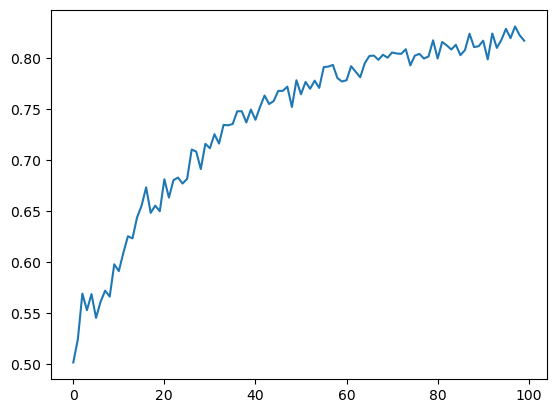

In [26]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [27]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [28]:
import numpy as np
from keras.preprocessing import image

dog_file = r'C:\Users\Chang.LAPTOP-KLP71L1N\Documents\SPECIAL_PROJECTS\Cats and Dogs\CATS_DOGS\CATS_DOGS\train\DOG\319.jpg'

dog_img = image.load_img(dog_file, target_size=(150,150))

dog_img = image.img_to_array(dog_img)


# must expand the image if needed to be 150 x 150 pixesl
dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255


In [29]:
prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 267ms/step


In [30]:
print(f'Probability that image is of a dog: {prediction_prob}')

Probability that image is of a dog: [[0.8741736]]
